In [1]:
import numpy as np
import matplotlib.pyplot as plt

Arbitary example function

$$ f(\bf{x}) = \exp{\left(\bf{x}^T\bf{x}\right)}\cos(\bf{a}^T\bf{x}) $$

$$ \nabla(\bf{x}) = \bf{a}\exp{\left(\bf{a}^T\bf{x}\right)}\cos(\bf{b}^T\bf{x}) - \bf{b}\exp{\left(\bf{a}^T\bf{x}\right)}\sin(\bf{b}^T\bf{x}) $$
$$ \nabla(\bf{x}) = \exp{\left(\bf{a}^T\bf{x}\right)}\left[\bf{a}\cos(\bf{b}^T\bf{x}) - \bf{b}\sin(\bf{b}^T\bf{x})\right] $$

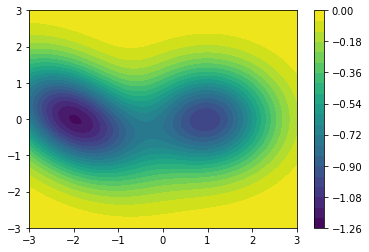

In [180]:
def dot_products(A, B):
    assert(A.shape == B.shape)
    return np.array([np.dot(A[:,i], B[:,i]) for i in range(A.shape[1])])

A = [
    np.array([[1, 0.4],
              [0.4, 1]]),
    np.array([[1, 0],
              [0, 1]])
]
b = [
    np.array([-2, 0]).reshape((2, 1)),
    np.array([1, 0]).reshape((2, 1))
]
c = [1.2, 1]
N = len(A)

def fi(x, i):
    return c[i] * np.exp(-0.5 * dot_products(
        x - b[i], np.matmul(A[i], x - b[i])
    ))

def f(x):
    f = 0
    for i in range(N):
        f -= fi(x, i)
    return f

def grad_f(x):
    grad = 0
    for i in range(N):
        grad += c[i] * fi(x, i) * np.matmul(
            A[i], x - b[i]
        )
    return grad

def H(x):
    # Assumes single vector
    x = x.reshape((2, 1))
    H = 0
    for i in range(N):
        v = np.matmul(A[i], x - b[i])
        H += c[i] * fi(x, i) * (A[i] - np.outer(v, v))
    return H

    
def plot_contours(f, xlower, xupper, ylower, yupper):
    X, Y = np.meshgrid(np.linspace(xlower, xupper, 100),
                       np.linspace(ylower, yupper, 100))
    points = np.concatenate(
        [X.reshape((X.shape[0], X.shape[1], 1)),
         Y.reshape((Y.shape[0], Y.shape[1], 1))
        ], axis=2)
    x = points.reshape((points.shape[0]*points.shape[1], points.shape[2]))
    x = np.transpose(x)
    z = f(x)
    Z = z.reshape((X.shape[0], X.shape[1]))
    plt.contourf(X, Y, Z, levels=20)
    plt.colorbar()
    
plot_contours(f, -3, 3, -3, 3)
plt.show()

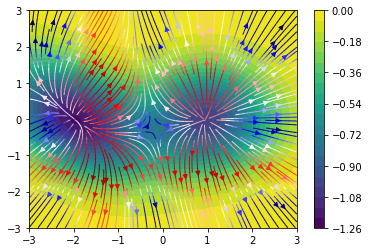

In [227]:
def plot_streamlines(f_vect, f_color, xlower, xupper, ylower, yupper):
    X, Y = np.meshgrid(np.linspace(xlower, xupper, 100),
                       np.linspace(ylower, yupper, 100))
    points = np.concatenate(
        [X.reshape((X.shape[0], X.shape[1], 1)),
         Y.reshape((Y.shape[0], Y.shape[1], 1))
        ], axis=2)
    x = points.reshape((points.shape[0]*points.shape[1], points.shape[2]))
    x = np.transpose(x)
    vect = f_vect(x)
    U = vect[0].reshape(X.shape[0], X.shape[1])
    V = vect[1].reshape(X.shape[0], X.shape[1])
    color = f_color(x)
    if len(color[color<0]) != 0 and len(color[color>0]) != 0:
        color[color<0] *= np.max(color)/(-np.min(color))
        color[color<0] -= 3
        color[color>0] += 3
    color = color.reshape(X.shape[0], X.shape[1])
    plt.streamplot(
        X, Y, U, V,
        color=color, linewidth=1, cmap='seismic', density=2
    )
    # plt.colorbar()

plot_contours(f, -3, 3, -3, 3)
plot_streamlines(
    grad_f,
    lambda x: np.array([np.linalg.norm(grad_f(x[:,i]))
                        for i in range(x.shape[1])]),
    -3, 3, -3, 3
)
plt.show()

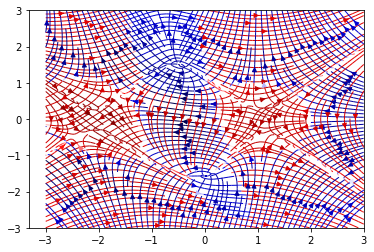

In [228]:
def H_eigenvector1(x):
    eigenvectors = np.zeros((2, x.shape[1]))
    for i in range(x.shape[1]):
        values, vectors = np.linalg.eig(H(x[:, i]))
        eigenvectors[:, i] = vectors[0]
    return eigenvectors

def H_eigenvector2(x):
    eigenvectors = np.zeros((2, x.shape[1]))
    for i in range(x.shape[1]):
        values, vectors = np.linalg.eig(H(x[:, i]))
        eigenvectors[:, i] = vectors[1]
    return eigenvectors

def H_eigenvalue1(x):
    eigenvectors = np.zeros(x.shape[1])
    for i in range(x.shape[1]):
        values, vectors = np.linalg.eig(H(x[:, i]))
        eigenvectors[i] = values[0]
    return eigenvectors

def H_eigenvalue2(x):
    eigenvectors = np.zeros(x.shape[1])
    for i in range(x.shape[1]):
        values, vectors = np.linalg.eig(H(x[:, i]))
        eigenvectors[i] = values[1]
    return eigenvectors

plot_streamlines(H_eigenvector1, H_eigenvalue1, -3, 3, -3, 3)
plot_streamlines(H_eigenvector2, H_eigenvalue2, -3, 3, -3, 3)
plt.show()

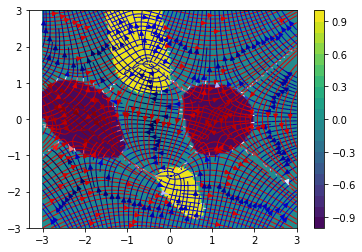

In [230]:
def H_region(x):
    regions = np.zeros(x.shape[1])
    for i in range(x.shape[1]):
        values, vectors = np.linalg.eig(H(x[:, i]))
        regions[i] = values[0] * values[1]
        if values[0] > 0 and values[1] > 0:
            regions[i] = -1
        elif values[0] < 0 and values[1] < 0:
            regions[i] = 1
        else:
            regions[i] = 0
    return regions

plot_contours(H_region, -3, 3, -3, 3)
plot_streamlines(H_eigenvector1, H_eigenvalue1, -3, 3, -3, 3)
plot_streamlines(H_eigenvector2, H_eigenvalue2, -3, 3, -3, 3)
plt.show()